Alumno: Carlos Alejandro Pérez Casares

TFG Predecir diabetes tipo 2

In [89]:
import pandas as pd
import xport

# Cargar datos BRFSS 2014
df = pd.read_csv("LLCP2014.csv")


/home/alex/.local/share/mamba/envs/gpu_env/lib/python3.9/site-packages/xport/__about__.py:18: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution
/tmp/ipykernel_21862/138320614.py:5: DtypeWarning: Columns (120) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("LLCP2014.csv")


In [90]:
print("Resumen de tipos de datos")
print(df.dtypes.value_counts())

Resumen de tipos de datos
float64    274
int64        4
object       1
dtype: int64


**Descartado de columnas variables) que se refieren a fechas y horas**

****Etapa 1.Dataset limpio****

In [92]:
df1 = df1.drop(columns=["_STATE", "FMONTH", "IDATE", "IMONTH", "IDAY", "IYEAR", "DISPCODE", "SEQNO", "_PSU"])

In [93]:
print("Resumen de tipos de datos")
print(df1.dtypes.value_counts())

Resumen de tipos de datos
float64    269
object       1
dtype: int64


***gráfica de barras con el recuento de frecuencias de la columna "DIABETE3"***

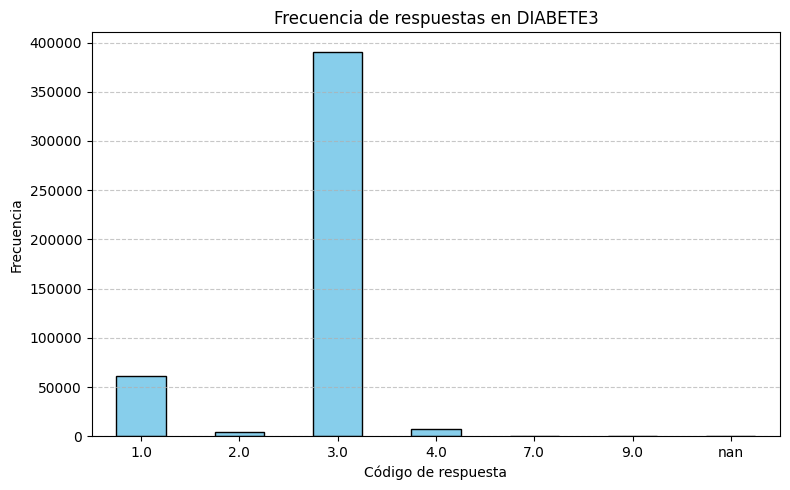

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame cargado como df1
# Recuento de frecuencias
counts = df1["DIABETE3"].value_counts(dropna=False).sort_index()

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Frecuencia de respuestas en DIABETE3")
plt.xlabel("Código de respuesta")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


La columna "DIABETE3" tiene varias categorías, pero solo queremos el valor 1: Sí diabetes y 3:No diabetes

In [6]:
df1 = df1[df1["DIABETE3"].isin([1, 3])]


In [106]:
df2 = df1

Filas del juego de datos para respondentes menores de 30 años (categorías 1 y 2) los descartamos. Menores de 30 años tendrían diabetes de tipo 1.

In [110]:
print("Resumen de tipos de datos")
print(df2.dtypes.value_counts())

Resumen de tipos de datos
float64    269
object       1
dtype: int64


In [126]:
df3 = df2.copy()

In [127]:
print("Resumen de tipos de datos")
print(df3.dtypes.value_counts())

Resumen de tipos de datos
float64    269
object       1
dtype: int64


In [128]:
df3.shape[1]

270

In [129]:
# Mostrar columnas de tipo object
object_cols = df3.select_dtypes(include='object').columns.tolist()
print("Columnas tipo object:", object_cols)


Columnas tipo object: ['DLYOTHER']


In [130]:
df3 = df3.drop('DLYOTHER', axis=1) # variable descartada del dataset

In [131]:
obj_cols = df3.select_dtypes(include=['object']).columns.tolist()
print(obj_cols)

[]


In [132]:
df3.shape[1] # número de variables en datafrane df3

269

In [133]:
print("Resumen de tipos de datos")
print(df3.dtypes.value_counts())

Resumen de tipos de datos
float64    269
dtype: int64


In [134]:
# Variables que no aportan nada
cols_to_drop = ['RCSBRAC1', 'RCSRACE1', 'RCHISLA1', 'RCSBIRTH']
existing = [c for c in cols_to_drop if c in df3.columns]
df3 = df3.drop(columns=existing)


In [135]:
df3.to_csv("df3.csv")

In [2]:
import pandas as pd
df = pd.read_csv('df3.csv')
df = df.drop_duplicates()

In [4]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [5]:
duplicates = pd.merge(train_df, test_df, how='inner')
print(f'Duplicados entre train y test: {len(duplicates)}')


Duplicados entre train y test: 0


In [6]:
df.to_csv("df3.csv")

In [7]:
print(df.dtypes.value_counts())

float64    265
int64        2
dtype: int64


### Codificar: 
3.0 -> 0 - no diabetes
1.0 -> 1 - si diabetes

In [27]:
df = pd.read_csv("df3.csv")

*Descartar el resto de filas de DIABETE3 que no contengan 3.0 y 1.0 en el dataframe df.*

In [28]:
df["DIABETE3"].isna().sum()


2

In [29]:
df["DIABETE3"].value_counts(dropna=False)


3.0    348061
1.0     60538
4.0      7403
2.0      3799
7.0       489
9.0       283
NaN         2
Name: DIABETE3, dtype: int64

- Mapeo: clase 0, no; clase 1, sí.

In [30]:
df = df[df["DIABETE3"].isin([1.0, 3.0])]
df["DIABETE3"] = df["DIABETE3"].map({1.0: 1, 3.0: 0}).astype(int)

- Dataset muy desiquilbrado respecto a la variable objetivo DIABETE3.

In [31]:
df["DIABETE3"].value_counts(dropna=False) # 


0    348061
1     60538
Name: DIABETE3, dtype: int64

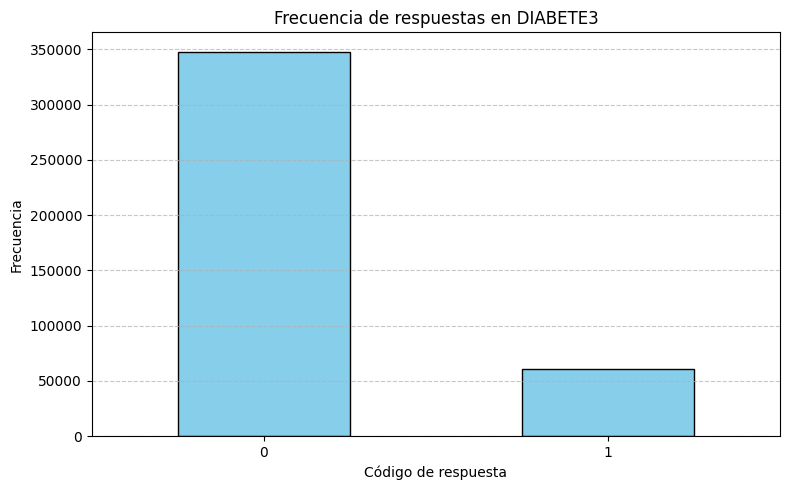

In [32]:
# DataFrame cargado como df1
# Recuento de frecuencias
import matplotlib.pyplot as plt

counts = df["DIABETE3"].value_counts(dropna=False).sort_index()

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Frecuencia de respuestas en DIABETE3")
plt.xlabel("Código de respuesta")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [33]:
df.to_csv("df3.csv")

## Split, imputación de valores faltantes, codificación de categorías a enteros, escalado (media y desviación estándar)

**Codificar columnas categóricas**
Fuente: GitHub (2020) Multi Column Label Encoder. 
https://gist.github.com/Saphirox/4204870c6e9c5fa28c7ac441fe1424ac [consultado 17/10/2025] Código adaptado.

Fuente: Machine Learning with PyTorch and Scikit-Learn.(2022)
https://learning.oreilly.com/library/view/machine-learning-with/9781801819312/Text/Chapter_4.xhtml#_idParaDest-82 [consultado 17/10/2025]
Código adaptado.

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# -----------------------------
# 1. Cargar dataset
# -----------------------------
df = pd.read_csv("df3.csv")

TARGET = "DIABETE3"
y = df[TARGET].astype(int)
X = df.drop(columns=[TARGET])

# -----------------------------
# 2. Split train/test
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 3. Detectar columnas categóricas y numéricas
#    (criterio: cardinalidad baja → categórica)
# -----------------------------
CARDINALITY_THRESHOLD = 10
nunique = X_train.nunique(dropna=True)

cat_cols = nunique[nunique <= CARDINALITY_THRESHOLD].index.tolist()
num_cols = [c for c in X_train.columns if c not in cat_cols]

print("Categóricas:", cat_cols)
print("Numéricas:", num_cols)

# -----------------------------
# 4. Imputación (fit en train)
# -----------------------------
imp_cat = SimpleImputer(strategy="most_frequent")
imp_num = SimpleImputer(strategy="mean")

X_train_cat = imp_cat.fit_transform(X_train[cat_cols])
X_test_cat  = imp_cat.transform(X_test[cat_cols])

X_train_num = imp_num.fit_transform(X_train[num_cols])
X_test_num  = imp_num.transform(X_test[num_cols])

# -----------------------------
# 5. Codificación (fit en train)
# -----------------------------
# convierte categorías en números enteros
enc = OrdinalEncoder( # reemplaza los valores enteros originales por nuevos códigos enteros
    dtype=int,
    handle_unknown="use_encoded_value",
    unknown_value=-1 # para valores desconocidos se pode -1  en vez de fallar
)

X_train_cat_enc = enc.fit_transform(X_train_cat)
X_test_cat_enc  = enc.transform(X_test_cat)

# -----------------------------
# 6. Escalado (fit en train)
# -----------------------------
# convierte las variables a una escala con: media = 0, desviación estándar = 1
scaler = StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled  = scaler.transform(X_test_num)

# -----------------------------
# 7. Reconstruir matrices finales
# -----------------------------
import numpy as np

X_train_final = np.hstack([X_train_num_scaled, X_train_cat_enc])
X_test_final  = np.hstack([X_test_num_scaled,  X_test_cat_enc])

print("Shape train final:", X_train_final.shape)
print("Shape test final:", X_test_final.shape)

Categóricas: ['CTELENUM', 'PVTRESD1', 'COLGHOUS', 'STATERES', 'LADULT', 'NUMWOMEN', 'GENHLTH', 'HLTHPLN1', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'EXERANY2', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3', 'ADDEPEV2', 'CHCKIDNY', 'LASTDEN3', 'RMVTETH3', 'VETERAN3', 'MARITAL', 'EDUCA', 'EMPLOY1', 'INCOME2', 'NUMHHOL2', 'NUMPHON2', 'CPDEMO1', 'INTERNET', 'RENTHOM1', 'SEX', 'PREGNANT', 'QLACTLM2', 'USEEQUIP', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'SMOKDAY2', 'STOPSMK2', 'LASTSMK2', 'USENOW3', 'FLUSHOT6', 'PNEUVAC3', 'SHINGLE2', 'SEATBELT', 'HADMAM', 'HOWLONG', 'PROFEXAM', 'LENGEXAM', 'HADPAP2', 'LASTPAP2', 'HADHYST2', 'PCPSAAD2', 'PCPSADI1', 'PCPSARE1', 'PSATEST1', 'PSATIME', 'PCPSARS1', 'BLDSTOOL', 'LSTBLDS3', 'HADSIGM3', 'HADSGCO1', 'LASTSIG3', 'HIVTST6', 'PDIABTST', 'PREDIAB1', 'INSULIN', 'EYEEXAM', 'DIABEYE', 'DIABEDU', 'MEDICARE', 'HLTHCVR1', 'DELAYMED', 'NOCOV121', 'LSTCOVRG', 'MEDSCOST', 'CARERCVD', 

In [ ]:
## Crear CSV a partir de `X_train_final` y `X_test_final`

Referencia: 
- Microsoft.(2025)Microsoft Copilot.(versión 1 de noviembre)[Large language model].  https://copilot.microsoft.com/chats/

In [35]:
import pandas as pd
import numpy as np

# --- Reconstruir DataFrames con nombres de columnas ---
# num_cols y cat_cols vienen del pipeline previo
all_cols = num_cols + cat_cols

df_train_final = pd.DataFrame(X_train_final, columns=all_cols)
df_test_final  = pd.DataFrame(X_test_final,  columns=all_cols)

# Añadir la variable objetivo
df_train_final["DIABETE3"] = y_train.values
df_test_final["DIABETE3"]  = y_test.values

# --- Exportar a CSV ---
df_train_final.to_csv("train_prepared.csv", index=False)
df_test_final.to_csv("test_prepared.csv", index=False)

print("Archivos generados: train_prepared.csv y test_prepared.csv")

Archivos generados: train_prepared.csv y test_prepared.csv


In [141]:
print(df.dtypes.value_counts())

float64    265
int64        1
dtype: int64


## ETAPA. Mitigación de sesgos con AIF360

AI Fairness 360 Development Team. (n.d.). AI Fairness 360
documentation (aif360 0.6.1). Read the Docs. [Consultado 7 nov 2025]
https://aif360.readthedocs.io/en/stable/index.html


- privileged_groups=[{'SEX': 1}] Hombre
- unprivileged_groups=[{'SEX': 0}]) Mujer

In [36]:
# Paso 1: Importar librerías
import pandas as pd
from aif360.datasets import StandardDataset
from aif360.algorithms.preprocessing import Reweighing
from aif360.metrics import BinaryLabelDatasetMetric

# Paso 2: Cargar CSV con pandas
df = pd.read_csv('train_prepared.csv')

# Paso 3: Convertir a StandardDataset
dataset = StandardDataset(df,
                          label_name='DIABETE3',
                          favorable_classes=[1],
                          protected_attribute_names=['SEX'],
                          privileged_classes=[[1]],
                          features_to_drop=[])

# Paso 4: Métrica de sesgo antes del preprocesamiento
metric_orig = BinaryLabelDatasetMetric(dataset,
                                       privileged_groups=[{'SEX': 1}],
                                       unprivileged_groups=[{'SEX': 0}])
print("Disparate impact (antes):", metric_orig.disparate_impact())

# Paso 5: Aplicar Reweighing
RW = Reweighing(unprivileged_groups=[{'SEX': 0}],
                privileged_groups=[{'SEX': 1}])
dataset_transf = RW.fit_transform(dataset)

# Paso 6: Métrica de sesgo después del preprocesamiento
metric_transf = BinaryLabelDatasetMetric(dataset_transf,
                                         privileged_groups=[{'SEX': 1}],
                                         unprivileged_groups=[{'SEX': 0}])
print("Disparate impact (después):", metric_transf.disparate_impact())

Disparate impact (antes): 1.1028660084117217
Disparate impact (después): 1.0000000000000002


- ¿Sesgo por edad?

In [37]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric

# crear columna (mediana) y la binaria
threshold = df['_AGE_G'].median() # '_AGEG5YR' está escalada como float
df['age_group'] = df['_AGE_G'].apply(lambda x: 'mayores' if x >= threshold else 'jóvenes')
df['age_group_bin'] = df['age_group'].map({'jóvenes': 0, 'mayores': 1})

# eliminar la columna string para evitar el error de conversión
df = df.drop(columns=['age_group'])



dataset_bin = StandardDataset(df,
                             label_name='DIABETE3',
                             favorable_classes=[1],
                             protected_attribute_names=['age_group_bin'],
                             privileged_classes=[[1]],
                             features_to_drop=[])
# privileged_groups=[{'age_group': 'mayores'}
metric_orig = BinaryLabelDatasetMetric(dataset_bin,
                                  privileged_groups=[{'age_group_bin': 1}],
                                  unprivileged_groups=[{'age_group_bin': 0}])
# Métrica antes
print("Disparate impact (antes):", metric_orig.disparate_impact())

# Reweighing (con age_group)
RW = Reweighing(unprivileged_groups=[{'age_group_bin': 0}],
                privileged_groups=[{'age_group_bin': 1}])
dataset_transf = RW.fit_transform(dataset_bin)

# Métrica después
metric_transf = BinaryLabelDatasetMetric(dataset_transf,
                                         privileged_groups=[{'age_group_bin': 1}],
                                         unprivileged_groups=[{'age_group_bin': 0}])
print("Disparate impact (después):", metric_transf.disparate_impact())

Disparate impact (antes): 0.37542245244029515
Disparate impact (después): 0.9999999999999998


- Hay sesgo por edad. Los jóvenes están perjudicados

- Actualizar los dasatset de train y test con la nueva columna calculada con AIF360

In [54]:
import pandas as pd
import json
from pathlib import Path

# Rutas
train_path = "train_prepared.csv"
test_path = "test_prepared.csv"
out_train = "train_prepared_with_agegroup.csv"
out_test = "test_prepared_with_agegroup.csv"
meta_path = "age_group_meta.json"

# Cargar
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)


# 1) Calcular umbral en train (mediana sobre columna escalada)
threshold = df_train['_AGE_G'].median()
print("threshold (train median):", threshold)

# 2) Función para crear columnas (usa el mismo umbral)
def add_age_group_cols(df, threshold):
    # crear etiqueta categórica si hace falta (opcional)
    df['age_group'] = df['_AGE_G'].apply(lambda x: 'mayores' if x >= threshold else 'jóvenes')
    # crear binaria 0/1
    df['age_group_bin'] = df['age_group'].map({'jóvenes': 0, 'mayores': 1})
    # asegurar tipo entero
    df['age_group_bin'] = df['age_group_bin'].astype(int)
    return df

# 3) Aplicar al train y al test
df_train = add_age_group_cols(df_train, threshold)
df_test  = add_age_group_cols(df_test, threshold)

# 4) Comprobaciones rápidas
print("Train age_group_bin distribution:\n", df_train['age_group_bin'].value_counts(dropna=False))
print("Test  age_group_bin distribution:\n", df_test['age_group_bin'].value_counts(dropna=False))


# 5) Guardar datasets y metadatos (umbral) para reproducibilidad
df_train.to_csv(out_train, index=False)
df_test.to_csv(out_test, index=False)

meta = {"age_group_threshold": float(threshold),
        "age_group_map": {"jóvenes": 0, "mayores": 1},
        "age_group_column": "age_group_bin",
        "source_train": train_path,
        "source_test": test_path}
Path(meta_path).write_text(json.dumps(meta, indent=2))
print("Saved:", out_train, out_test, meta_path)

threshold (train median): 4.0
Train age_group_bin distribution:
 1    205786
0    121093
Name: age_group_bin, dtype: int64
Test  age_group_bin distribution:
 1    51514
0    30206
Name: age_group_bin, dtype: int64
Saved: train_prepared_with_agegroup.csv test_prepared_with_agegroup.csv age_group_meta.json


In [57]:
df_prueba_AIF360 = pd.read_csv("train_prepared_with_agegroup.csv")

In [58]:
df_prueba_AIF360["DIABETE3"].value_counts(dropna=False)


0    278449
1     48430
Name: DIABETE3, dtype: int64

- Métricas AIF360 con modelo LogisticRegression

## Comparar métricas antes y  después de la mitigación con AIF360

Trusted-AI. (n.d.). demo_reweighing_preproc.ipynb [Notebook de Jupyter]. GitHub. Recuperado de https://github.com/Trusted-AI/AIF360/blob/main/examples/demo_reweighing_preproc.ipynb

In [63]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from aif360.datasets import StandardDataset
from aif360.metrics import ClassificationMetric
from aif360.algorithms.preprocessing import Reweighing

# -------------------
# 1. Preparar datasets
# -------------------
df_train = pd.read_csv("train_prepared_with_agegroup.csv")
df_test = pd.read_csv("test_prepared_with_agegroup.csv")

df_train['age_group'] = df_train['age_group'].map({'jóvenes': 0, 'mayores': 1}).astype(int)
df_test['age_group'] = df_test['age_group'].map({'jóvenes': 0, 'mayores': 1}).astype(int)

# Asegúrate de que DIABETE3 y age_group_bin estén en binario (0/1)
print("DIABETE3:", df_train['DIABETE3'].unique())
print("age_group_bin:", df_train['age_group_bin'].unique())

# Crear StandardDataset para train y test
dataset_train = StandardDataset(df_train,
                                label_name='DIABETE3',
                                favorable_classes=[1],
                                protected_attribute_names=['age_group_bin'],
                                privileged_classes=[[1]])

dataset_test = StandardDataset(df_test,
                               label_name='DIABETE3',
                               favorable_classes=[1],
                               protected_attribute_names=['age_group_bin'],
                               privileged_classes=[[1]])

privileged_groups = [{'age_group_bin': 1}]
unprivileged_groups = [{'age_group_bin': 0}]

# -------------------
# 2. Baseline fairness
# -------------------
X_train = df_train.drop(columns=['DIABETE3','age_group_bin'])
y_train = df_train['DIABETE3']
X_test = df_test.drop(columns=['DIABETE3','age_group_bin'])
y_test = df_test['DIABETE3']

clf = LogisticRegression(max_iter=2000)
clf.fit(X_train, y_train)

df_test['y_pred_base'] = clf.predict(X_test)

bld_true = dataset_test
bld_pred_base = bld_true.copy(deepcopy=True)
bld_pred_base.labels = df_test['y_pred_base'].values.reshape(-1,1)

metric_base = ClassificationMetric(bld_true, bld_pred_base,
                                   unprivileged_groups=unprivileged_groups,
                                   privileged_groups=privileged_groups)

print("Baseline fairness metrics:")
print("Disparate Impact:", metric_base.disparate_impact())
print("Equal Opportunity Difference:", metric_base.equal_opportunity_difference())
print("Average Odds Difference:", metric_base.average_odds_difference())

# -------------------
# 3. Mitigación con Reweighing
# -------------------
RW = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
RW.fit(dataset_train)
dataset_train_transf = RW.transform(dataset_train)

# Exportar dataset transformado (opcional)
df_train_transf = dataset_train_transf.convert_to_dataframe()[0]
df_train_transf.to_csv("train_aif360_reweighing.csv", index=False)

# -------------------
# 4. Post‑mitigación fairness
# -------------------
# Entrenar modelo con pesos ajustados
X_train_transf = df_train_transf.drop(columns=['DIABETE3','age_group_bin'])
y_train_transf = df_train_transf['DIABETE3']
sample_weights = dataset_train_transf.instance_weights

clf.fit(X_train_transf, y_train_transf, sample_weight=sample_weights)

df_test['y_pred_post'] = clf.predict(X_test)

bld_pred_post = bld_true.copy(deepcopy=True)
bld_pred_post.labels = df_test['y_pred_post'].values.reshape(-1,1)

metric_post = ClassificationMetric(bld_true, bld_pred_post,
                                   unprivileged_groups=unprivileged_groups,
                                   privileged_groups=privileged_groups)

print("\nPost‑mitigation fairness metrics:")
print("Disparate Impact:", metric_post.disparate_impact())
print("Equal Opportunity Difference:", metric_post.equal_opportunity_difference())
print("Average Odds Difference:", metric_post.average_odds_difference())


DIABETE3: [0 1]
age_group_bin: [1 0]
Baseline fairness metrics:
Disparate Impact: 0.2999843365492318
Equal Opportunity Difference: -0.07823412855242562
Average Odds Difference: -0.0499327569358369

Post‑mitigation fairness metrics:
Disparate Impact: 0.5970036316508509
Equal Opportunity Difference: 0.15824664019764617
Average Odds Difference: 0.07854047941071023


## Métricas de rendimiento con scikit‑learn

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("\nPre‑mitigación:")
print("Accuracy:", accuracy_score(y_test, df_test['y_pred_base']))
print("Precision:", precision_score(y_test, df_test['y_pred_base']))
print("Recall:", recall_score(y_test, df_test['y_pred_base']))
print("F1:", f1_score(y_test, df_test['y_pred_base']))

print("\nPost‑mitigación:")
print("Accuracy:", accuracy_score(y_test, df_test['y_pred_post']))
print("Precision:", precision_score(y_test, df_test['y_pred_post']))
print("Recall:", recall_score(y_test, df_test['y_pred_post']))
print("F1:", f1_score(y_test, df_test['y_pred_post']))



Pre‑mitigación:
Accuracy: 0.905702398433676
Precision: 0.824057714958775
Recall: 0.4622563594317806
F1: 0.5922751322751323

Post‑mitigación:
Accuracy: 0.908210964268233
Precision: 0.85237876701851
Recall: 0.46019160885365046
F1: 0.5976937516760525


## Gráficas que comparan si la mitigación afecta al rendimiento del modelo

Microsoft Copilot. (2025). Ejemplo de visualización de métricas de rendimiento y fairness antes y después de mitigación [Código en Python]. Recuperado de conversación con Copilot, 16 de noviembre de 2025.

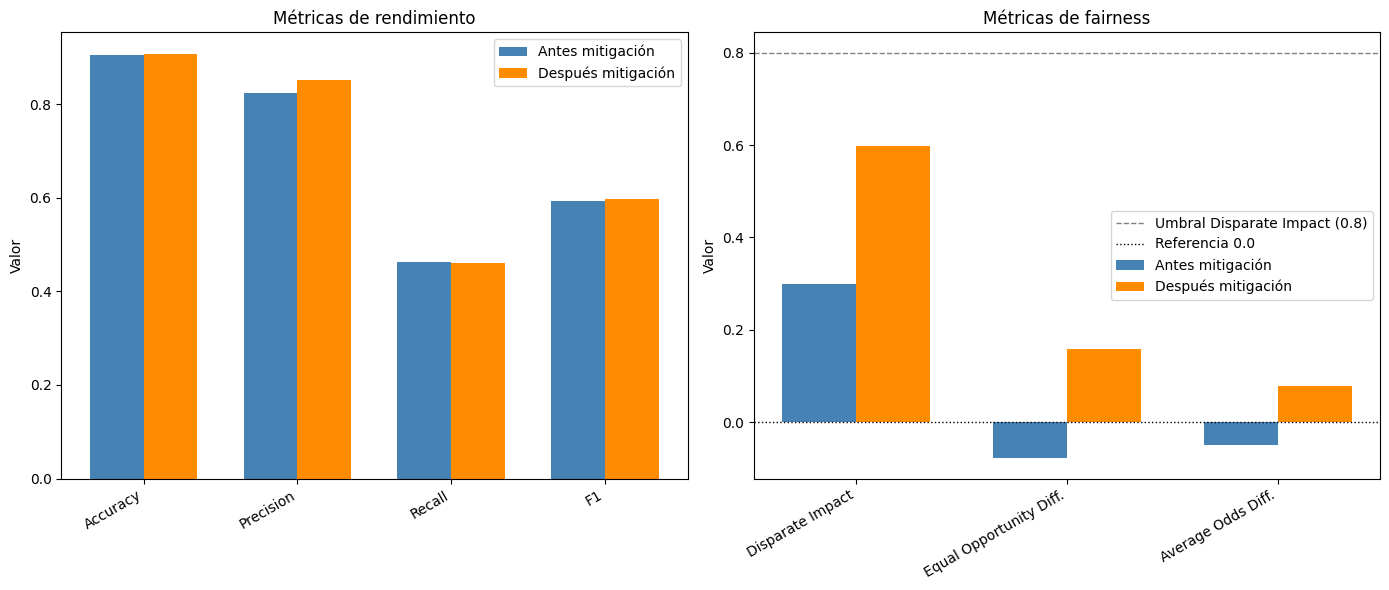

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Valores antes mitigación
metrics_perf = ["Accuracy", "Precision", "Recall", "F1"]
baseline_perf = [0.9057, 0.8240, 0.4622, 0.5922]
post_perf     = [0.9082, 0.8523, 0.4601, 0.5976]
# Valores post-mitigación
metrics_fair = ["Disparate Impact", "Equal Opportunity Diff.", "Average Odds Diff."]
baseline_fair = [0.299, -0.078, -0.0499]
post_fair     = [0.597,  0.158,  0.078]

# Posiciones en el eje X
x_perf = np.arange(len(metrics_perf))
x_fair = np.arange(len(metrics_fair))
width = 0.35

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# -------------------
# Subplot 1: Rendimiento
# -------------------
axes[0].bar(x_perf - width/2, baseline_perf, width, label='Antes mitigación', color='steelblue')
axes[0].bar(x_perf + width/2, post_perf, width, label='Después mitigación', color='darkorange')

axes[0].set_title("Métricas de rendimiento")
axes[0].set_xticks(x_perf)
axes[0].set_xticklabels(metrics_perf, rotation=30, ha='right')
axes[0].set_ylabel("Valor")
axes[0].legend()

# -------------------
# Subplot 2: Fairness
# -------------------
axes[1].bar(x_fair - width/2, baseline_fair, width, label='Antes mitigación', color='steelblue')
axes[1].bar(x_fair + width/2, post_fair, width, label='Después mitigación', color='darkorange')

axes[1].axhline(0.8, color='gray', linestyle='--', linewidth=1, label='Umbral Disparate Impact (0.8)')
axes[1].axhline(0.0, color='black', linestyle=':', linewidth=1, label='Referencia 0.0')

axes[1].set_title("Métricas de fairness")
axes[1].set_xticks(x_fair)
axes[1].set_xticklabels(metrics_fair, rotation=30, ha='right')
axes[1].set_ylabel("Valor")
axes[1].legend()

plt.tight_layout()
plt.show()


## ETAPA. Balanceado con SMOTENC

In [2]:
import pandas as pd

df = pd.read_csv("train_aif360_reweighing.csv")

# Eliminar columnas Unnamed
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

df.to_csv("train_aif360_reweighing_clean.csv", index=False)


### RFE sobre una muestra antes de aplicar balanceo con SMOTENC 

- Fuente: stackoverflow (26/02/2022). Uso de RFE y pipeline. https://stackoverflow.com/questions/71279499/get-support-and-ranking-attributes-for-rfe-using-pipeline-in-python-3     [Consultado 20/10/2025] Código adaptado a partir de stackoverflow (2022)

- Fuente: Building Machine Learning Pipelines, 2nd Edition.(2025) https://learning.oreilly.com/library/view/building-machine-learning/9781098165222/ch07.html#transformations_in_scikit_learn_pipelin [Consultado 21/10/2025] Código adaptado

- Fuente:Scikit learn. Uso de RFE. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html [Consultado 21/10/2025] Código adaptado a partir de Scikit learn

- Fuente:Scikit learn. Reemplazando los valores faltantes por la media en cada columna. https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html Código adaptado a partir de Scikit learn [Consultado 21/10/2025]


- Aplicación de RFE (30 características). Se seleccionan un subconjunto de de variables del dataset y luego apliamos SMOTENC sobre ese subconjunto

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# -----------------------------
# 1. Cargar dataset limpio
# -----------------------------
df = pd.read_csv("train_aif360_reweighing_clean.csv")

TARGET = "DIABETE3"
y = df[TARGET].astype(int)
X = df.drop(columns=[TARGET])

# -----------------------------
# 2. Tomar muestra estratificada
# -----------------------------
SAMPLE_SIZE = 50000  # ajustable según recursos

df_sample, _ = train_test_split(
    df,
    train_size=SAMPLE_SIZE,
    stratify=df[TARGET],
    random_state=42
)

X_sample = df_sample.drop(columns=[TARGET])
y_sample = df_sample[TARGET].astype(int)

# -----------------------------
# 3. RFE con RandomForestClassifier
# -----------------------------
model = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Número de características a seleccionar
N_FEATURES = 30

selector = RFE(
    estimator=model,
    n_features_to_select=N_FEATURES,
    step=0.1  # elimina el 10% de features por iteración
)

selector.fit(X_sample, y_sample)

# -----------------------------
# 4. Obtener columnas seleccionadas
# -----------------------------
selected_features = X_sample.columns[selector.support_].tolist()

print("Número de variables seleccionadas:", len(selected_features))
print(selected_features)

Número de variables seleccionadas: 30
['DIABAGE2', 'WEIGHT2', 'BLDSUGAR', 'FEETCHK2', 'DOCTDIAB', 'CHKHEMO3', 'FEETCHK', 'DRVISITS', '_STSTR', '_STRWT', '_WT2RAKE', '_AGE80', '_DUALCOR', '_LLCPWT2', '_LLCPWT', '_AGEG5YR', 'WTKG3', '_BMI5', '_DRNKMO4', 'GENHLTH', 'EMPLOY1', 'DIFFWALK', 'PNEUVAC3', 'PDIABTST', 'PREDIAB1', 'DIABEDU', '_RFHLTH', '_AGE_G', '_BMI5CAT', 'age_group']


## Aplicar SMOTENC

In [10]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTENC
from collections import Counter

# -----------------------------------------
# 1. CONFIGURACIÓN
# -----------------------------------------
DATA_PATH = "df3.csv"
OUTPUT_PATH = "train_aif360_reweighing_rfe_smote.csv"

FEATURES = [
    'INCOME2', '_AGE_G', 'EDUCA', 'EMPLOY1', '_INCOMG',
    '_BMI5CAT', 'PREDIAB1','GENHLTH', 'RMVTETH3', 'QSTVER',
    'EYEEXAM','INSULIN', 'USEEQUIP', '_RFBMI5','DIFFWALK',
    'PNEUVAC3', '_RFHLTH', '_BMI5', 'WTKG3', '_AGE80'
]

TARGET = "DIABETE3"

cat_cols = [
    'INCOME2', '_AGE_G', 'EDUCA', 'EMPLOY1', '_INCOMG',
    '_BMI5CAT', 'PREDIAB1','GENHLTH', 'RMVTETH3', 'QSTVER',
    'EYEEXAM','INSULIN', 'USEEQUIP', '_RFBMI5','DIFFWALK',
    'PNEUVAC3', '_RFHLTH'
]

num_cols = ['_BMI5', 'WTKG3', '_AGE80']

# -----------------------------------------
# 2. CARGAR BRFSS ORIGINAL
# -----------------------------------------
df = pd.read_csv(DATA_PATH)

# -----------------------------------------
# 3. LIMPIEZA BÁSICA
# -----------------------------------------
df = df.replace([888.0, 88.0, 77.0, 99.0], np.nan)

# -----------------------------------------
# 4. FILTRAR VARIABLES RFE + TARGET
# -----------------------------------------
missing = [c for c in FEATURES + [TARGET] if c not in df.columns]
if missing:
    raise ValueError(f"Faltan columnas en el BRFSS original: {missing}")

df_sel = df[FEATURES + [TARGET]].copy()

# -----------------------------------------
# 5. IMPUTACIÓN (evita NaN antes de SMOTENC)
# -----------------------------------------

# Categóricas → moda
for col in cat_cols:
    df_sel[col] = df_sel[col].fillna(df_sel[col].mode()[0])

# Numéricas → mediana
for col in num_cols:
    df_sel[col] = df_sel[col].fillna(df_sel[col].median())

# Target → eliminar filas con NaN (muy raro)
df_sel = df_sel.dropna(subset=[TARGET])

# -----------------------------------------
# 6. PREPARAR X e y
# -----------------------------------------
X_sel = df_sel[FEATURES].copy()
y_sel = df_sel[TARGET].astype(int)

# -----------------------------------------
# 7. ÍNDICES CATEGÓRICOS PARA SMOTENC
# -----------------------------------------
cat_feature_indices = [X_sel.columns.get_loc(c) for c in cat_cols]

# -----------------------------------------
# 8. APLICAR SMOTENC
# -----------------------------------------
smote_nc = SMOTENC(
    categorical_features=cat_feature_indices,
    random_state=42
)

X_res, y_res = smote_nc.fit_resample(X_sel, y_sel)

print("Distribución original:", Counter(y_sel))
print("Distribución balanceada:", Counter(y_res))

# -----------------------------------------
# 9. GUARDAR DATASET FINAL
# -----------------------------------------
df_res = pd.DataFrame(X_res, columns=X_sel.columns)
df_res[TARGET] = y_res

df_res.to_csv(OUTPUT_PATH, index=False)
print(f"Dataset guardado en: {OUTPUT_PATH}")


Distribución original: Counter({0: 348061, 1: 60538})
Distribución balanceada: Counter({1: 348061, 0: 348061})
Dataset guardado en: train_aif360_reweighing_rfe_smote.csv


### Gráficas antes y después del balanceado con SMOTENC

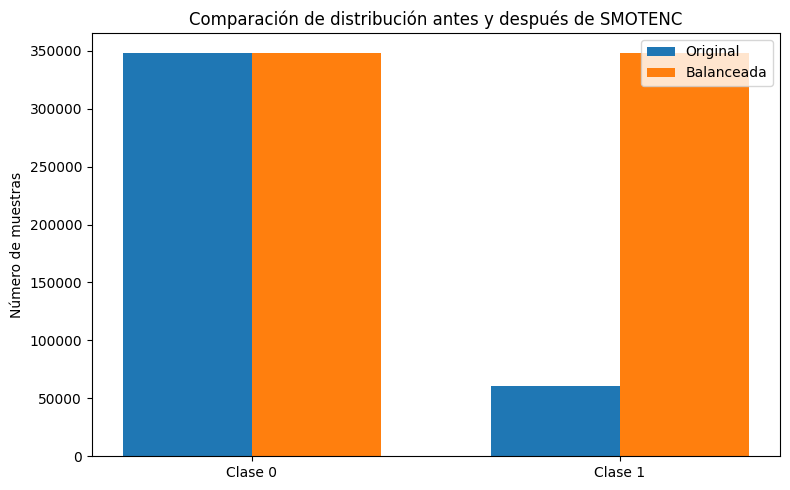

In [11]:
import matplotlib.pyplot as plt

# Datos
original = {0: 348061, 1: 60538}
balanceada = {0: 348061, 1: 348061}

# Preparar datos para la gráfica
labels = ['Clase 0', 'Clase 1']
orig_values = [original[0], original[1]]
bal_values = [balanceada[0], balanceada[1]]

x = range(len(labels))
width = 0.35

# Crear figura
plt.figure(figsize=(8, 5))

plt.bar([p - width/2 for p in x], orig_values, width=width, label='Original')
plt.bar([p + width/2 for p in x], bal_values, width=width, label='Balanceada')

plt.xticks(x, labels)
plt.ylabel('Número de muestras')
plt.title('Comparación de distribución antes y después de SMOTENC')
plt.legend()
plt.tight_layout()
plt.show()


## Dimensiones reducidas a 30 variables más explicativas

In [13]:
print(df_res[FEATURES].mean().sort_values())


_RFHLTH        1.313764
PNEUVAC3       1.752069
DIFFWALK       1.756011
USEEQUIP       1.831422
INSULIN        1.960655
EYEEXAM        2.023810
_RFBMI5        2.203262
GENHLTH        2.932391
PREDIAB1       2.940628
_BMI5CAT       3.120907
RMVTETH3       4.074779
_INCOMG        4.318806
EMPLOY1        4.634179
EDUCA          4.828092
_AGE_G         5.033339
INCOME2        5.834365
QSTVER        13.210480
_AGE80        61.189435
_BMI5       2932.675500
WTKG3       8424.423881
dtype: float64


- Mostrar en una gráfica y ordenadas de mayor a menor influencia en la variable objetivo "DIABETE3" las 50 columnas seleccionadas más explicativas

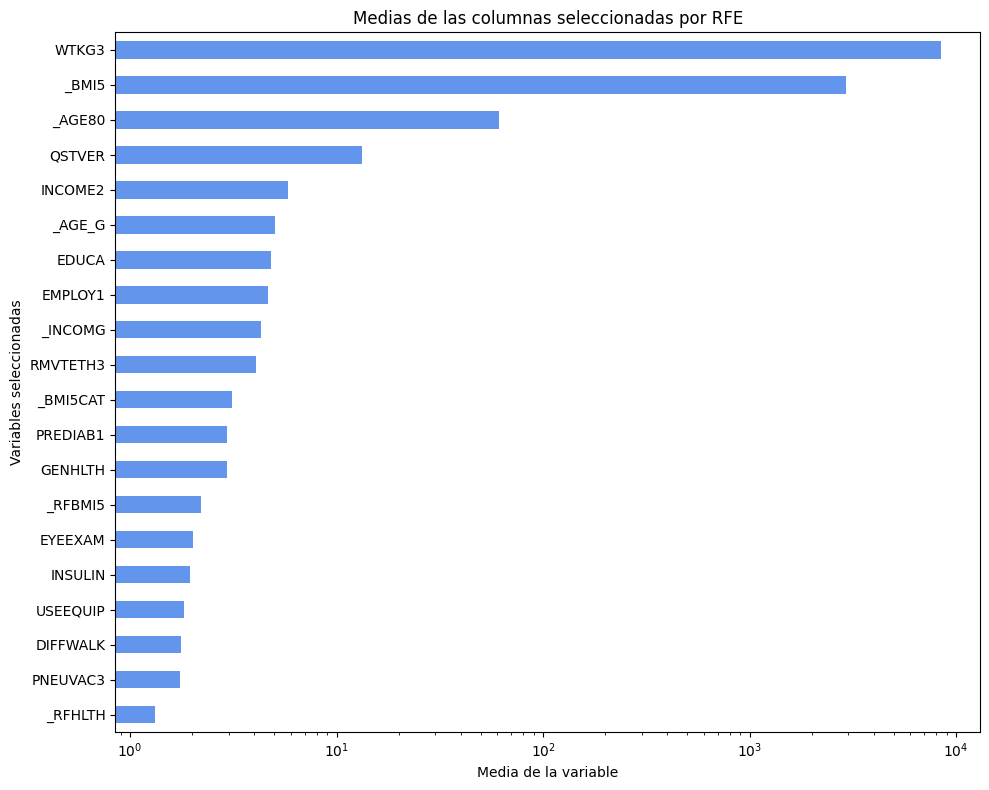

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


# Asegurarse de que DIABETE3 no esté en las features
features = df_res.drop(columns=['DIABETE3', "DIABAGE2"], errors='ignore')

# Calcular la media de cada una de las 30 columnas seleccionadas
mean_vals = features.mean().sort_values(ascending=True)

# Crear gráfico de barras horizontales
fig, ax = plt.subplots(figsize=(10, 8))
mean_vals.plot.barh(ax=ax, color="cornflowerblue")

# Etiquetas
ax.set_xlabel("Media de la variable")
ax.set_ylabel("Variables seleccionadas")
ax.set_title("Medias de las columnas seleccionadas por RFE")
plt.xscale("log")

plt.tight_layout()
plt.show()


### Obtener las 25 variables más explicativas a partir del dataframe df_res que generaste después de aplicar RFE + SMOTENC

- Las 20 varibles más explicativas según RFE y vistas en la gráfica anterior ordenadas por orden de influencia.

In [11]:
["WTKG3","_BMI5","_AGE80","QSTVER","INCOME2","_AGE_G","EDUCA","EMPLOY1","_INCOMG","RMVTETH3",
"_BMI5CAT","PREDIAB1","GENHLTH","_RFBMI5","EYEEXAM","INSULIN","USEEQUIP","DIFFWALK","PNEUVAC3","_RFHLTH" ] 

('MEDSCOST', 'DIABEYE', '_HCVU651', 'CHCKIDNY', 'INSULIN', 'CVDINFR4')

## Entrenar algoritmo de  aprendizaje automático Regresión Logística

In [36]:
import pandas as pd

df_selected = pd.read_csv("train_aif360_reweighing_rfe_smote.csv")

- Evitar DIABAGE2 fuga de etiqueta; predice target al 100%

# Regresión Logística

Fuente: Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition.
https://learning.oreilly.com/library/view/hands-on-machine-learning/9781098125967/ch04.html#id86
[Consultado 30/10/2025] Código adaptado.

## Creación del modelo y métricas

In [15]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,recall_score,f1_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve,precision_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# CONFIG
DATA_PATH = "train_aif360_reweighing_rfe_smote.csv"  # CSV de trabajo
FEATURES = ["WTKG3","_BMI5","_AGE80","QSTVER","INCOME2",
"_AGE_G","EDUCA","EMPLOY1","_INCOMG","RMVTETH3",
"_BMI5CAT","PREDIAB1","GENHLTH","_RFBMI5","EYEEXAM",
"INSULIN","USEEQUIP","DIFFWALK","PNEUVAC3","_RFHLTH"] 
TARGET = "DIABETE3"
RANDOM_STATE = 42
TEST_SIZE = 0.20

# Cargar  (0 = diabetes sí)
df = pd.read_csv(DATA_PATH)

# Valores del tipo No sabe / No responde en la encuesta BRFSS
df = df.replace([888.0, 88.0, 77.0, 99.0], np.nan)

X = df[FEATURES].copy()
y = df[TARGET]

print("Balance de clases antes de dividir con train_test_split :", Counter(y))

# División train/test
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE)

# Pipeline: imputación + regresión logística
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=True))
])

preproc = ColumnTransformer([
    ("cat", cat_pipe, FEATURES)
], remainder="drop")

modelo_rl = Pipeline([
    ("preproc", preproc),
    ("clf", LogisticRegression(class_weight="balanced", solver="saga", max_iter=2000, random_state=42))
])

# Validación cruzada estratificada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    modelo_rl.fit(X_train, y_train)
    y_pred = modelo_rl.predict(X_test)
    y_proba = modelo_rl.predict_proba(X_test)[:,0]  # columna 0 = clase 0 (diabetes sí)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=0)
    rec = recall_score(y_test, y_pred, pos_label=0)
    f1 = f1_score(y_test, y_pred, pos_label=0)
    
    try:
        roc_auc = roc_auc_score(y_test, 1 - y_proba)
    except ValueError:
        roc_auc = np.nan  # si en un fold falta una clase

    results.append([fold, acc, prec, rec, f1, roc_auc])

# Convertir a DataFrame para resumen
df_results = pd.DataFrame(results, columns=["Fold","Accuracy","Precision","Recall","F1","ROC_AUC"])
print(df_results)
print("\nPromedios:")
print(df_results.mean(numeric_only=True))



Balance de clases antes de dividir con train_test_split : Counter({1: 348061, 0: 348061})
   Fold  Accuracy  Precision    Recall        F1   ROC_AUC
0     1  0.931607   0.892366  0.981612  0.934864  0.976306
1     2  0.931643   0.893041  0.980751  0.934843  0.976102
2     3  0.931973   0.893207  0.981268  0.935169  0.976005
3     4  0.930371   0.889817  0.982388  0.933814  0.976226
4     5  0.931736   0.892924  0.981124  0.934949  0.976132

Promedios:
Fold         3.000000
Accuracy     0.931466
Precision    0.892271
Recall       0.981429
F1           0.934728
ROC_AUC      0.976154
dtype: float64


- Métricas LogisticRegression

In [16]:
print(confusion_matrix(y_test, y_pred))


[[68298  1314]
 [ 8190 61422]]


In [17]:
# Guardar el modelo en disco
import joblib

joblib.dump(modelo_rl, "modelo_rl.pkl")
joblib.dump(X_train.columns.tolist(), "columnas_rl.pkl")


['columnas_rl.pkl']

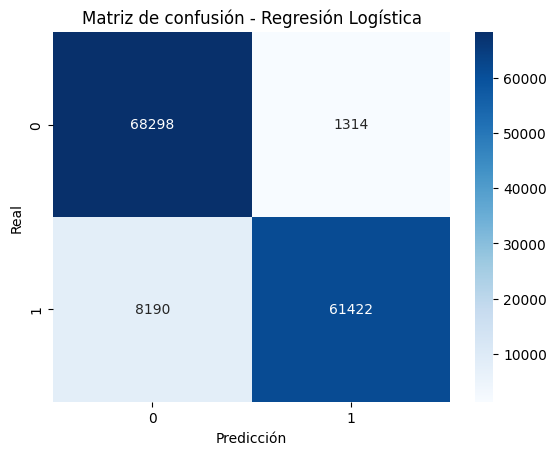

In [18]:
# Visualización
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Regresión Logística")
plt.show()


In [19]:
# Curva ROC para Regresión Logística
y_proba_rl = y_proba
fpr_rl, tpr_rl, _ = roc_curve(y_test, y_proba_rl, pos_label=1)
auc_rl = roc_auc_score(y_test, y_proba_rl)

## SHAP

Przybyla-Kasperek, M. (2021). Machine learning for time series forecasting with Python. Packt Publishing. Recuperado de https://learning.oreilly.com/library/view/machine-learning-for/9781839217715/Text/Chapter_12.xhtml [Código adaptado]

- Para regresión logística, SHAP es equivalente a:
SHAPj=(xj−xˉj)⋅βj

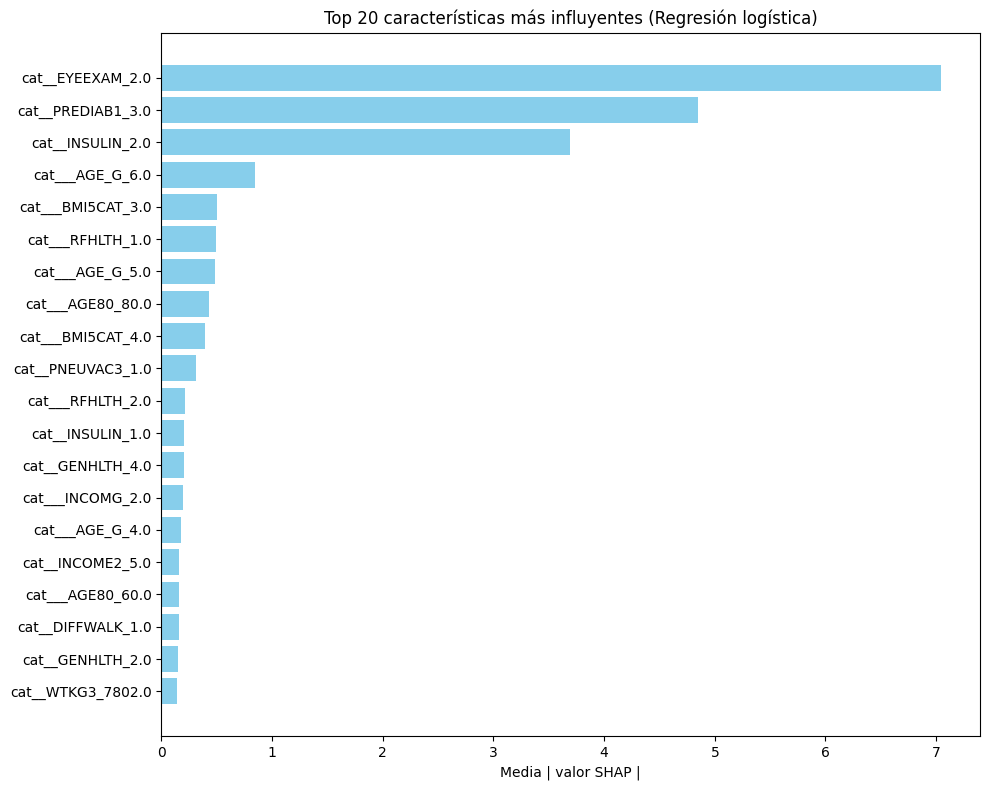

In [36]:
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
from scipy import sparse
import matplotlib.pyplot as plt
import joblib

# -----------------------------
# 1. Cargar dataset balanceado
# -----------------------------
DATA_PATH = "train_aif360_reweighing_rfe_smote.csv"
FEATURES = ["WTKG3","_BMI5","_AGE80","QSTVER","INCOME2",
"_AGE_G","EDUCA","EMPLOY1","_INCOMG","RMVTETH3",
"_BMI5CAT","PREDIAB1","GENHLTH","_RFBMI5","EYEEXAM",
"INSULIN","USEEQUIP","DIFFWALK","PNEUVAC3","_RFHLTH"]
TARGET = "DIABETE3"

df = pd.read_csv(DATA_PATH)
X = df[FEATURES]
y = df[TARGET].astype(int)

# -----------------------------
# 2. Cargar pipeline y modelo
# -----------------------------
pipeline = joblib.load("modelos4/modelo_rl.pkl")
modelo_final = pipeline.named_steps["clf"]

# -----------------------------
# 3. Transformar X con preprocesador
# -----------------------------
X_trans = pipeline.named_steps["preproc"].transform(X[FEATURES])
X_trans = sparse.csr_matrix(X_trans)  # asegurar formato disperso

# -----------------------------
# 4. Calcular SHAP manual en paralelo
# -----------------------------
coef = modelo_final.coef_[0]
mean = np.asarray(X_trans.mean(axis=0)).ravel()

def shap_col(j):
    col = X_trans[:, j]
    return np.abs(col.multiply(coef[j]) - col.multiply(mean[j])).mean()

mean_shap = Parallel(n_jobs=12)(
    delayed(shap_col)(j) for j in range(X_trans.shape[1])
)

mean_shap = np.array(mean_shap)

# -----------------------------
# 5. Crear DataFrame ordenado
# -----------------------------
feature_names = pipeline.named_steps["preproc"].get_feature_names_out()
shap_df = pd.DataFrame({
    "Feature": feature_names,
    "Mean |SHAP value|": mean_shap
}).sort_values(by="Mean |SHAP value|")

# -----------------------------
# 6. Gráfica limpia (Top 20)
# -----------------------------
top_n = 20
shap_df_top = shap_df.tail(top_n)

plt.figure(figsize=(10, 8))
plt.barh(shap_df_top["Feature"], shap_df_top["Mean |SHAP value|"], color="skyblue")
plt.xlabel("Media | valor SHAP |")
plt.title(f"Top {top_n} características más influyentes (Regresión logística)")
plt.tight_layout()
plt.show()
